# Pré-processamento de dados
- Eliminação manual de atributos
- Integração de dados
- Amostragem de dados
- Balanceamento de dados
- Limpeza de dados
- Redução de dimensionalidade
- Transformação de dados: Normalização

### Dataset
[Kaggle Brazil Covid19](https://www.kaggle.com/unanimad/corona-virus-brazil?select=brazil_covid19.csv)


OBS: Os números não significam, necessariamente, que as infecções e mortes aconteceram de um dia para o outro, porque o balanço estadual considera a data em que os diagnósticos foram contabilizados no sistema.

## Exploração de dados
- **Estatística Descritiva**

In [370]:
import pandas as pd

In [371]:
df = pd.read_csv('brazil_covid19.csv')
df.sample(10)

,date,region,state,cases,deaths
3409,2020-06-30,Nordeste,MA,80451,2048
1504,2020-04-20,Norte,TO,34,1
1585,2020-04-23,Norte,TO,37,2
3706,2020-07-11,Nordeste,MA,98398,2426
2162,2020-05-15,Centro-Oeste,MS,479,14
3075,2020-06-17,Sul,PR,11085,386
2858,2020-06-09,Sudeste,SP,150138,9522
1477,2020-04-19,Norte,TO,33,1
1920,2020-05-06,Centro-Oeste,MT,379,13
1845,2020-05-03,Nordeste,PE,8643,652


In [372]:
# Depende do interesse em determinado dado
df.drop(columns=['region'])

,date,state,cases,deaths
0,2020-02-25,DF,0,0
1,2020-02-25,GO,0,0
2,2020-02-25,MS,0,0
3,2020-02-25,MT,0,0
4,2020-02-25,AL,0,0
...,...,...,...,...
3748,2020-07-12,RJ,129684,11415
3749,2020-07-12,SP,371997,17848
3750,2020-07-12,PR,42537,1045
3751,2020-07-12,RS,39240,962


In [373]:
# for i in range(0, len(df['cases'])):
#   # df.loc[i, 'cases'] = int(df['cases'][i].replace(',', ''))

In [374]:
# Médias
df.mean()

cases     15213.901412
deaths      726.512124
dtype: float64

In [375]:
# Medianas
df.median()

cases     1846.0
deaths      64.0
dtype: float64

In [376]:
# Moda do número de casos
df['cases'].mode()

0    0
dtype: int64

In [377]:
estados = df['state'].value_counts()
estados.sample(5)

AP    139
MA    139
AL    139
TO    139
SE    139
Name: state, dtype: int64

In [378]:
(estados/len(df)).sample(5)

MA    0.037037
MG    0.037037
PA    0.037037
PI    0.037037
PR    0.037037
Name: state, dtype: float64

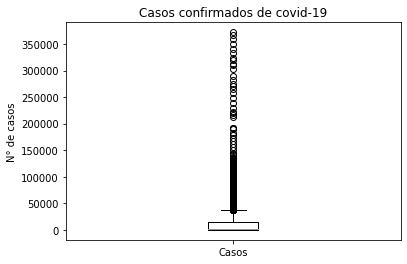

In [379]:
import matplotlib.pyplot as plt

plt.boxplot(df['cases'])
plt.title('Casos confirmados de covid-19')
plt.ylabel('N° de casos')
plt.xticks([1], ['Casos'])

plt.show()

In [380]:
variancia = df['cases'].var()
desvio_padrao = df['cases'].std()

# os valores encontrados apresentam grandes oscilações, isto
# é os dados variam muito.
# variância alta, logo alta volatilidade.
print(f'\033[1mσ²\033[0m = {round(variancia, 2)}\n\033[1mσ\033[0m = {round(desvio_padrao, 2)}')

σ² = 1122464551.06
σ = 33503.2


## Dados Multivariados

- Correlação positiva: ambas as variáveis mudam na mesma direção.
- Correlação Nula: Nenhuma relação na mudança das variáveis.
- Correlação Negativa: as variáveis mudam em direções opostas.

In [381]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")

,cases,deaths
cases,1.000000,0.934907
deaths,0.934907,1.000000


In [382]:
df.loc[df['state'] == "SP"].sample(n=4, random_state=2)

,date,region,state,cases,deaths
2750,2020-06-05,Sudeste,SP,134565,8842
3074,2020-06-17,Sudeste,SP,191517,11521
1319,2020-04-13,Sudeste,SP,8895,608
1778,2020-04-30,Sudeste,SP,28698,2375


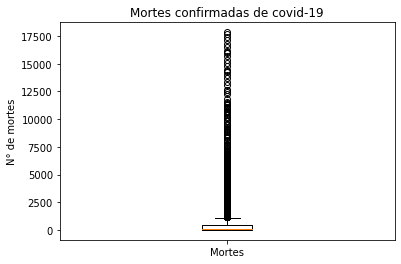

In [383]:
plt.boxplot(df['deaths'])
plt.title('Mortes confirmadas de covid-19')
plt.ylabel('N° de mortes')
plt.xticks([1], ['Mortes'])

plt.show()